In [2]:
%matplotlib inline
from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt

In [29]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    ALEA = 3

In [30]:
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''
    
    portes = [0, 1, 2]
    
    bonne_porte = randint(0, 2)
    
    premier_choix = randint(0, 2)
    
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0, 1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.ALEA:
        deuxieme_choix = premier_choix if randint(0, 1) == 0 else portes[0]
    else:
        raise ValueError("Stratégie non reconnue!")
        
    return deuxieme_choix == bonne_porte

In [32]:
play_game(Strategie.ALEA)

True

In [16]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''

    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [36]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))

print("En gradant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("En choisissant aléatoirement, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.ALEA, 10000))))

En changeant de porte, le joueur a gagné 6719 sur 10000 parties.
En gradant son choix initial, le joueur a gagné 3323 sur 10000 parties.
En choisissant aléatoirement, le joueur a gagné 4912 sur 10000 parties.


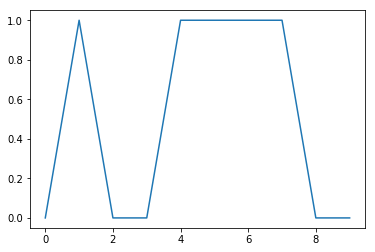

In [34]:
plot = plt.plot(play(Strategie.CHANGER, 10))

Scatter permet de ne pas relier les points par des lignes

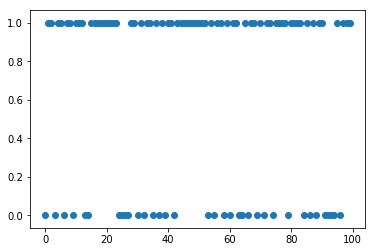

In [23]:
plot = plt.scatter(range(100), play(Strategie.CHANGER, 100))

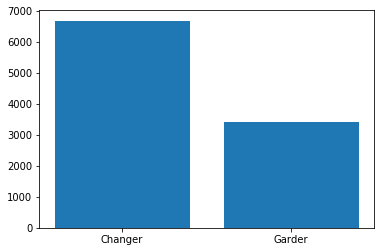

In [24]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

In [37]:
gains_changer = []
gains_garder = []
gains_alea = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]

for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_alea.append(play(Strategie.ALEA, tours))

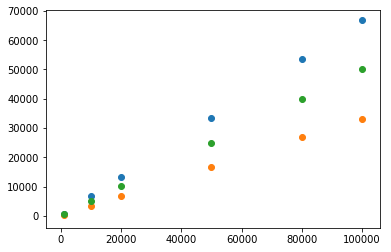

In [38]:
figure = plt.figure()

plot = plt.scatter(samples, [sum(x) for x in gains_changer])

plot = plt.scatter(samples, [sum(x) for x in gains_garder])

plot = plt.scatter(samples, [sum(x) for x in gains_alea])

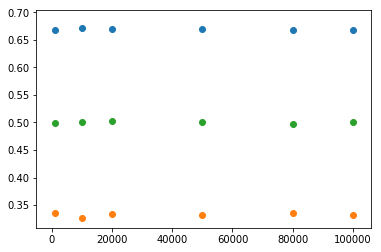

In [39]:
figure = plt.figure()

plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_changer])

plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_garder])

plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_alea])